In [2]:
# Load necessary libraries
import pandas as pd         # For data wrangling
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns       # For enhanced visualizations
from datetime import datetime  # For handling dates
import matplotlib.dates as mdates  # For better date formatting in visualizations


Step 1: Load the dataset

In [3]:
avocado_data = pd.read_csv("avocado.csv")

Step 2: Inspect the first few rows of the dataset

In [4]:
# Display the first 5 rows of the DataFrame
print(avocado_data.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

Step 3: Data Wrangling and Cleaning

In [5]:
# Check for missing values
print(avocado_data.isna().sum().sum())  # Total missing values in the dataset

# Display the first few rows of the dataset
print(avocado_data.head())

# Check for missing or invalid values in the 'Date' column
print(avocado_data['Date'].isna().sum())

# Convert the 'Date' column to datetime format
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'], format='%Y-%m-%d', errors='coerce')

# Handle missing values: Remove rows with NA values
avocado_data = avocado_data.dropna()

# Check data types and structure
print(avocado_data.info())

# Convert 'type' column to a categorical type
avocado_data['type'] = avocado_data['type'].astype('category')

# Ensure the 'region' column is a categorical type
avocado_data['region'] = avocado_data['region'].astype('category')

# Check for duplicate rows and remove them
avocado_data = avocado_data.drop_duplicates()


0
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  201

Step 4: Data Transformation

In [6]:
# Create a new column for Year and Month to analyze trends over time
avocado_data['Year'] = avocado_data['Date'].dt.year
avocado_data['Month'] = avocado_data['Date'].dt.month_name()

Step 5: Exploratory Data Analysis (EDA)

In [7]:
# Summary statistics for price and volume
print(avocado_data['AveragePrice'].describe())
print(avocado_data['Total Volume'].describe())

# Calculate total sales per region and type of avocado
total_sales = avocado_data.groupby(['region', 'type']).agg(
    total_sales=('Total Volume', 'sum'),
    Avg_Price=('AveragePrice', 'mean')
).reset_index()

print(total_sales)


count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64
count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: Total Volume, dtype: float64
                  region          type   total_sales  Avg_Price
0                 Albany  conventional  1.570061e+07   1.348757
1                 Albany       organic  3.671885e+05   1.773314
2                Atlanta  conventional  8.666139e+07   1.068817
3                Atlanta       organic  1.943727e+06   1.607101
4    BaltimoreWashington  conventional  1.307456e+08   1.344201
..                   ...           ...           ...        ...
103              TotalUS       organic  1.635186e+08   1.546036
104                 West  conventional  1.049361e+09   0.985089
10

C:\Users\Jayoda Kulatunga\AppData\Local\Temp\ipykernel_10116\2408044790.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales = avocado_data.groupby(['region', 'type']).agg(


Step 6: Create Compelling Visualizations

6.1: Time Series of Average Price Over Time (Line Plot)

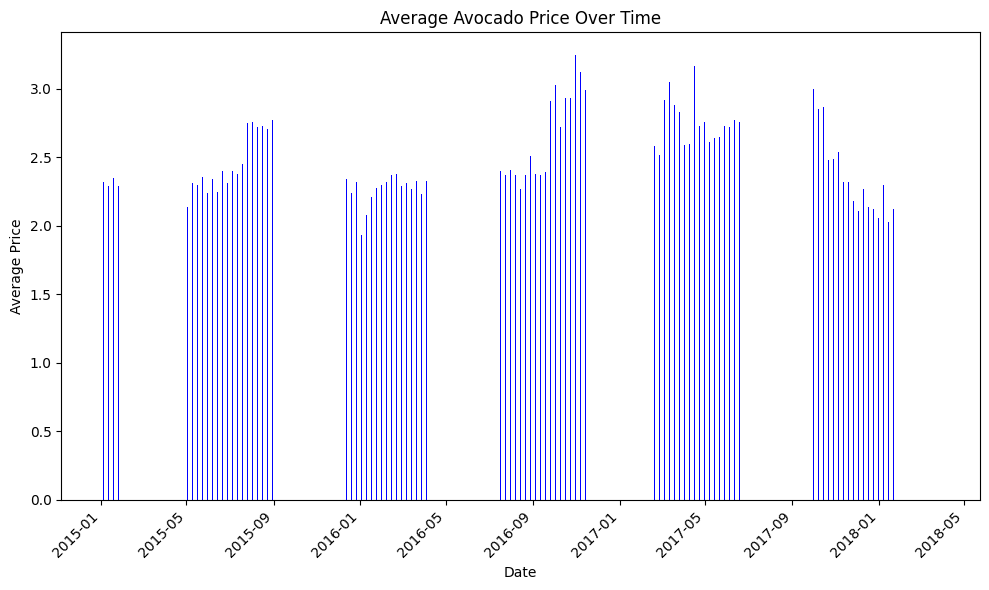

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'])

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot a bar chart
plt.bar(avocado_data['Date'], avocado_data['AveragePrice'], color='blue')

# Title and labels
plt.title('Average Avocado Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



6.2: Total Volume of Avocados Sold by Region (Bar Plot)

C:\Users\Jayoda Kulatunga\AppData\Local\Temp\ipykernel_10116\2952901219.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = avocado_data.groupby('region')['Total Volume'].sum().plot(kind='bar', color='skyblue')


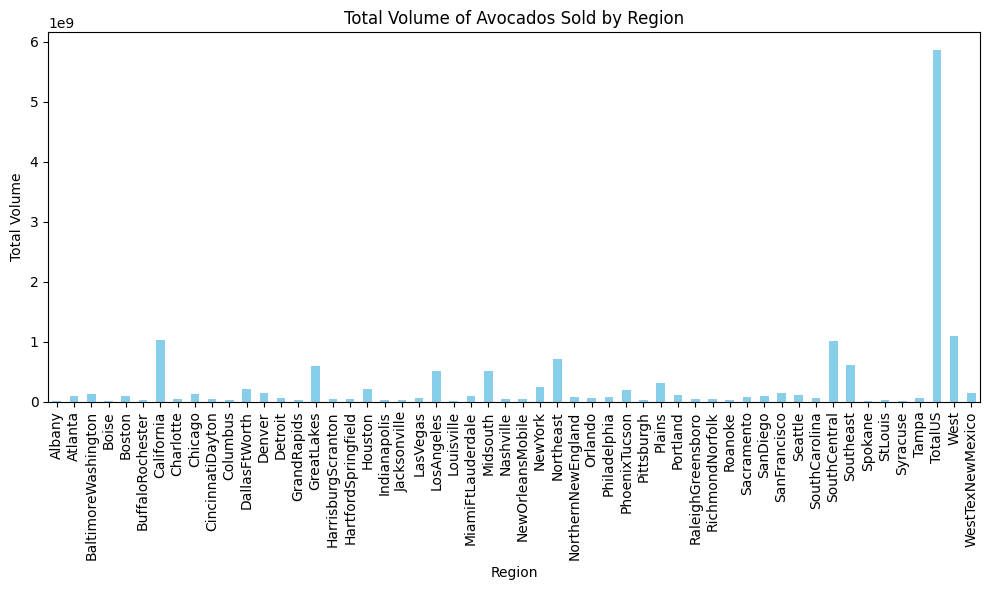

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming avocado_data is already loaded as a pandas DataFrame

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = avocado_data.groupby('region')['Total Volume'].sum().plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Total Volume of Avocados Sold by Region')
plt.xlabel('Region')
plt.ylabel('Total Volume')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


6.3: Average Price vs. Total Volume (Scatter Plot)

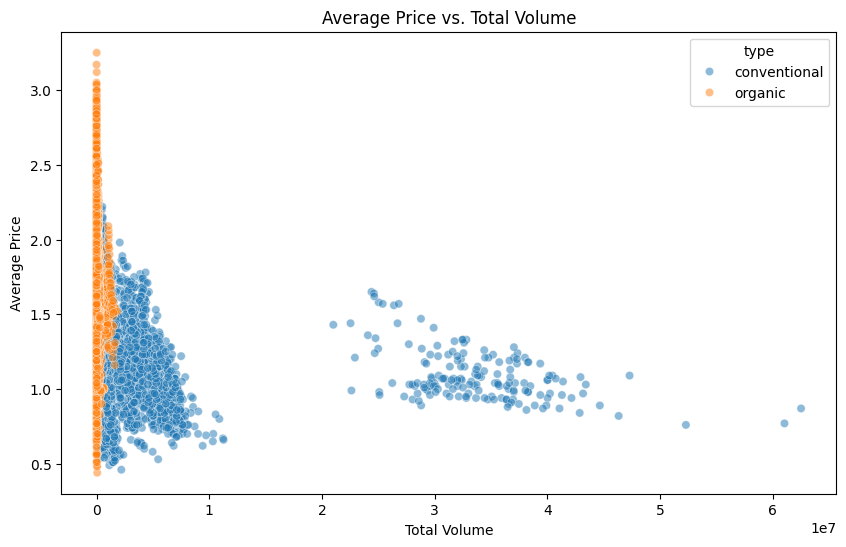

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming avocado_data is a pandas DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avocado_data, x='Total Volume', y='AveragePrice', hue='type', alpha=0.5)

# Adding titles and labels
plt.title('Average Price vs. Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')

# Show plot
plt.show()


6.4: Average Price Comparison by Type (Bar Plot)

C:\Users\Jayoda Kulatunga\AppData\Local\Temp\ipykernel_10116\581525862.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type', y='AveragePrice', data=avocado_data, estimator='mean', ci=None, palette='Set2')
C:\Users\Jayoda Kulatunga\AppData\Local\Temp\ipykernel_10116\581525862.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='AveragePrice', data=avocado_data, estimator='mean', ci=None, palette='Set2')


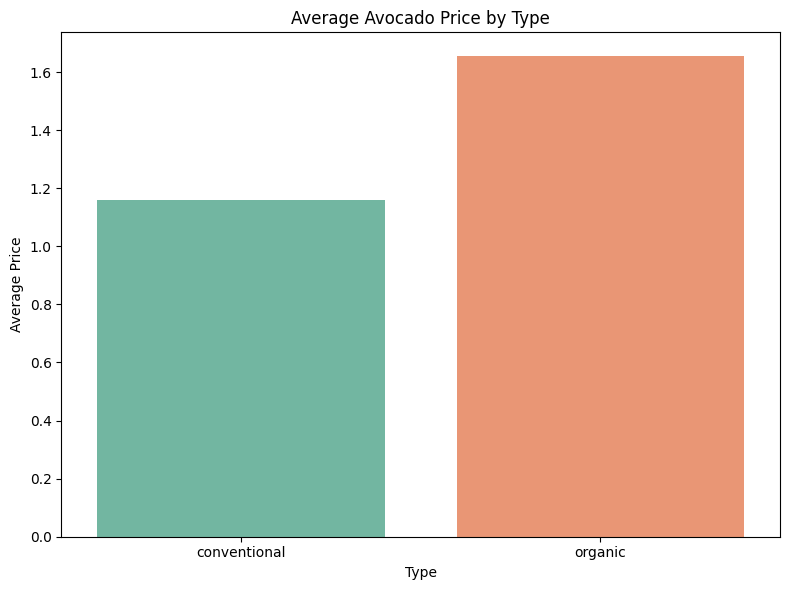

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming avocado_data is a pandas DataFrame
# Replace 'avocado_data' with your actual DataFrame

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(x='type', y='AveragePrice', data=avocado_data, estimator='mean', ci=None, palette='Set2')

# Add labels and title
plt.title("Average Avocado Price by Type")
plt.xlabel("Type")
plt.ylabel("Average Price")

# Show the plot
plt.tight_layout()
plt.show()


6.5: Monthly Price Trends (Line Plot by Month)

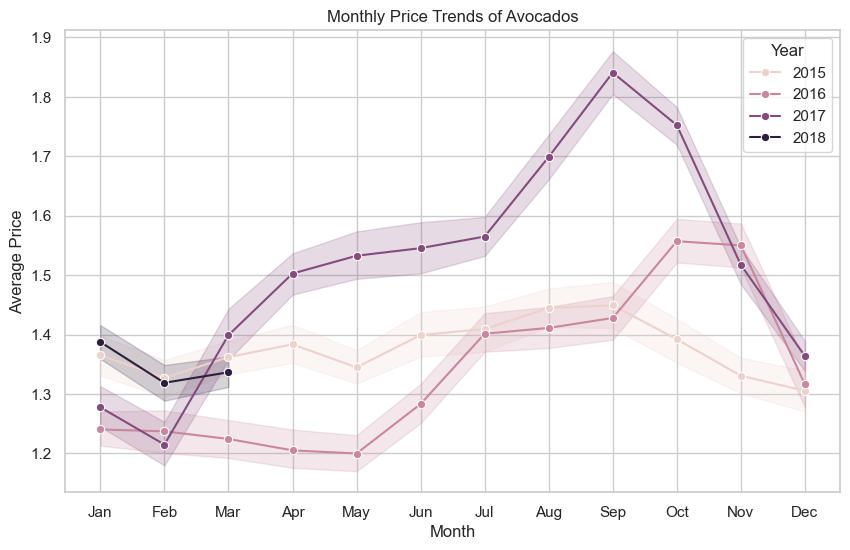

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming avocado_data is a pandas DataFrame
# Map month names to numeric values
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Convert 'Month' from string to numeric using the month_mapping dictionary
avocado_data['Month'] = avocado_data['Month'].map(month_mapping)

# Set the color palette
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avocado_data, x='Month', y='AveragePrice', hue='Year', marker='o')

# Customize the plot
plt.title("Monthly Price Trends of Avocados")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')

# Show the plot
plt.show()


Step 7: Insights
Identify trends in pricing over time

In [17]:
import pandas as pd

# Assuming avocado_data is a pandas DataFrame
price_trends = avocado_data.groupby(['Year', 'Month'])['AveragePrice'].mean().reset_index()
price_trends.rename(columns={'AveragePrice': 'Avg_Price'}, inplace=True)


In [18]:
import pandas as pd

# Display the first 5 rows of the dataset
print(avocado_data.head())


   Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  Year  Month  
0  2015  Albany  2015     12  
1  2015  Albany  2015   

Insight 1: Look for seasonal trends in avocado pricing

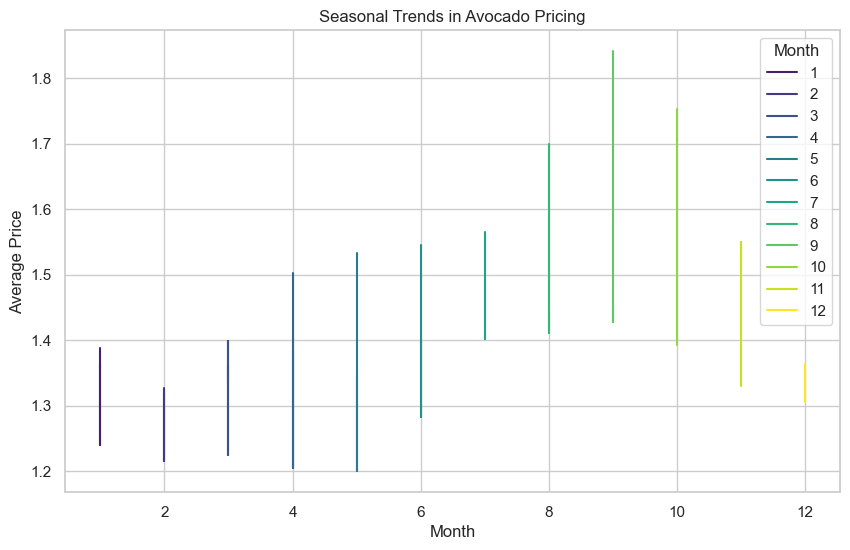

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming price_trends is a DataFrame with 'Month' and 'Avg_Price' columns
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the line, color each line by month using a colormap
for month in price_trends['Month'].unique():
    month_data = price_trends[price_trends['Month'] == month]
    plt.plot(month_data['Month'], month_data['Avg_Price'], label=str(month), color=plt.cm.viridis(month/12))

# Set plot title and labels
plt.title('Seasonal Trends in Avocado Pricing')
plt.xlabel('Month')
plt.ylabel('Average Price')

# Add a legend
plt.legend(title='Month')

# Apply a valid style
plt.style.use('ggplot')  # or 'seaborn-whitegrid', 'fivethirtyeight', etc.

# Show the plot
plt.show()


Insight 2: Investigate if organic or conventional avocados tend to have higher prices

In [23]:
import pandas as pd

# Assuming avocado_data is already loaded into a pandas DataFrame
avg_price_by_type = avocado_data.groupby('type')['AveragePrice'].mean().reset_index()
avg_price_by_type.rename(columns={'AveragePrice': 'Avg_Price'}, inplace=True)

print(avg_price_by_type)


           type  Avg_Price
0  conventional   1.158040
1       organic   1.653999


C:\Users\Jayoda Kulatunga\AppData\Local\Temp\ipykernel_10116\327592288.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_type = avocado_data.groupby('type')['AveragePrice'].mean().reset_index()


Step 8: Conclusion
Based on the analysis:
1. Seasonality and regional trends in avocado prices.
2. Price differences between organic and conventional avocados.
3. Impact of total volume on price trends (potential demand shifts).


Step 9: Save the cleaned data to a new CSV file

In [24]:
import pandas as pd
import os

avocado_data.to_csv("avocado_data_clean.csv", index=False)

# Confirm that the file has been saved
os.path.exists("avocado_data_clean.csv")


True

avocado_data_clean.csv

In [ ]:
# Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
# 0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12
# 1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12
# 2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12
# 3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,conventional,2015,Albany,2015,12
# 4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11
# 5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,2015,11
# 6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,2015,11
# 7,2015-11-08,0.98,109428.33,703.75,101815.36,80.0,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,2015,11
# 8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,2015,11
# 9,2015-10-25,1.07,74338.76,842.4,64757.44,113.0,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,2015,10
# 10,2015-10-18,1.12,84843.44,924.86,75595.85,117.07,8205.66,7877.86,327.8,0.0,conventional,2015,Albany,2015,10
# 11,2015-10-11,1.28,64489.17,1582.03,52677.92,105.32,10123.9,9866.27,257.63,0.0,conventional,2015,Albany,2015,10
# 12,2015-10-04,1.31,61007.1,2268.32,49880.67,101.36,8756.75,8379.98,376.77,0.0,conventional,2015,Albany,2015,10
# 13,2015-09-27,0.99,106803.39,1204.88,99409.21,154.84,6034.46,5888.87,145.59,0.0,conventional,2015,Albany,2015,9
# 14,2015-09-20,1.33,69759.01,1028.03,59313.12,150.5,9267.36,8489.1,778.26,0.0,conventional,2015,Albany,2015,9
# 15,2015-09-13,1.28,76111.27,985.73,65696.86,142.0,9286.68,8665.19,621.49,0.0,conventional,2015,Albany,2015,9
# 16,2015-09-06,1.11,99172.96,879.45,90062.62,240.79,7990.1,7762.87,227.23,0.0,conventional,2015,Albany,2015,9
# 17,2015-08-30,1.07,105693.84,689.01,94362.67,335.43,10306.73,10218.93,87.8,0.0,conventional,2015,Albany,2015,8
# 18,2015-08-23,1.34,79992.09,733.16,67933.79,444.78,10880.36,10745.79,134.57,0.0,conventional,2015,Albany,2015,8
# 19,2015-08-16,1.33,80043.78,539.65,68666.01,394.9,10443.22,10297.68,145.54,0.0,conventional,2015,Albany,2015,8
# 20,2015-08-09,1.12,111140.93,584.63,100961.46,368.95,9225.89,9116.34,109.55,0.0,conventional,2015,Albany,2015,8
